# Importação de bibliotecas

In [2]:
import numpy as np
from ucimlrepo import fetch_ucirepo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from utils.classifier_utils import ClassifierUtils
from utils.image_generator import ImageGenerator
from classifiers.KNN_classifier import KNNClassifier
from classifiers.NCC_classifier import NCClassifier
from utils.distance_calculator import DistanceCalculator
from utils.dataset_utils import DatasetUtils

# Definição de constantes

In [3]:
np.random.seed(42)
K_NUMBER = 9
TARGET_COLUMN_NAME = 'class'
TEST_SIZE = 0.2
HOLDOUT_INDEXES_NUMBER = 20
FIG_SIZE = (10, 8)
IMAGE_FONT_SIZE = 20
RESOLUTION_POINTS = 500

# Baixando dataset coluna vertebral

In [4]:
vertebral_column = fetch_ucirepo(id=212)

X_coluna = vertebral_column.data.features
y_coluna = vertebral_column.data.targets

coluna_df = pd.concat([X_coluna, y_coluna], axis='columns')

# Verificando número de classes

In [5]:
list(coluna_df[TARGET_COLUMN_NAME].unique())

['Hernia', 'Spondylolisthesis', 'Normal']

# Redefinindo classes para valores numéricos

In [6]:
class_mapping = {'Hernia': 0, 'Spondylolisthesis': 1, 'Normal': 2}
coluna_df[TARGET_COLUMN_NAME] = coluna_df[TARGET_COLUMN_NAME].map(class_mapping)
coluna_df[TARGET_COLUMN_NAME]

0      0
1      0
2      0
3      0
4      0
      ..
305    2
306    2
307    2
308    2
309    2
Name: class, Length: 310, dtype: int64

# Funções diversas

# Treinamento e avaliação dos modelos, juntamente com a criação de tabela de métricas para o KNN(k-vizinhos mais próximos)

In [7]:
knn_holdout_indexes = ClassifierUtils.create_multiple_holdout_indexes(df=coluna_df, n_indexes=HOLDOUT_INDEXES_NUMBER,
                                                                      test_size=TEST_SIZE)

knn_accuracy_list = []

for train_indexes, test_indexes in knn_holdout_indexes:
    X_train, y_train, X_test, y_test = ClassifierUtils.separate_train_test(df=coluna_df, train_indexes=train_indexes,
                                                                           test_indexes=test_indexes,
                                                                           target_column_name=TARGET_COLUMN_NAME)
    y_pred = KNNClassifier.predict(X_train=X_train, y_train=y_train, X_test=X_test, k=K_NUMBER,
                                   distance_calculator_function=DistanceCalculator.calculate_euclidean_distance)

    accuracy = ClassifierUtils.calculate_accuracy(y_true=y_test, y_pred=y_pred)
    error_rate = ClassifierUtils.calculate_error_rate(y_true=y_test, y_pred=y_pred)

    confusion_matrix_result = ClassifierUtils.confusion_matrix(y_true=y_test, y_pred=y_pred)

    knn_accuracy_list.append((accuracy, error_rate, train_indexes, test_indexes, y_pred, confusion_matrix_result))

df_results_knn = pd.DataFrame(knn_accuracy_list,
                              columns=['accuracy', 'error_rate', 'train_indexes', 'test_indexes', 'y_pred',
                                       'confusion_matrix'])

df_results_knn

,accuracy,error_rate,train_indexes,test_indexes,y_pred,confusion_matrix
0,0.838710,0.161290,"[289, 9, 57, 60, 25, 63, 92, 184, 244, 46, 75,...","[1, 130, 257, 134, 263, 264, 13, 14, 270, 271,...","[0, 1, 2, 1, 2, 2, 0, 0, 2, 0, 2, 2, 2, 1, 1, ...","[[9, 0, 6], [0, 26, 1], [3, 0, 17]]"
1,0.774194,0.225806,"[242, 244, 216, 213, 44, 236, 164, 77, 40, 145...","[3, 255, 5, 12, 141, 142, 16, 17, 146, 19, 272...","[0, 1, 2, 0, 1, 1, 0, 2, 1, 0, 2, 1, 1, 2, 1, ...","[[9, 0, 7], [0, 29, 2], [3, 2, 10]]"
2,0.806452,0.193548,"[173, 70, 245, 249, 288, 167, 277, 280, 106, 9...","[0, 258, 4, 133, 7, 135, 9, 11, 13, 142, 143, ...","[2, 2, 2, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, ...","[[11, 1, 5], [1, 23, 1], [3, 1, 16]]"
3,0.838710,0.161290,"[5, 200, 8, 11, 47, 153, 198, 159, 267, 194, 1...","[0, 129, 258, 131, 4, 132, 260, 262, 136, 9, 1...","[0, 1, 2, 1, 2, 1, 2, 2, 1, 0, 1, 1, 0, 0, 1, ...","[[7, 1, 4], [0, 32, 1], [4, 0, 13]]"
4,0.838710,0.161290,"[297, 0, 30, 175, 123, 109, 21, 187, 263, 105,...","[3, 255, 133, 260, 8, 137, 13, 16, 144, 145, 1...","[0, 1, 1, 2, 0, 1, 0, 2, 1, 1, 0, 2, 2, 2, 2, ...","[[8, 0, 5], [0, 25, 1], [3, 1, 19]]"
5,0.758065,0.241935,"[278, 194, 297, 15, 139, 284, 150, 254, 56, 12...","[257, 132, 260, 6, 261, 265, 11, 12, 268, 16, ...","[2, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 1, 2, 1, ...","[[6, 1, 5], [1, 24, 0], [5, 3, 17]]"
6,0.854839,0.145161,"[290, 306, 293, 114, 31, 214, 226, 261, 193, 1...","[0, 1, 129, 130, 132, 256, 260, 7, 263, 9, 265...","[0, 0, 1, 1, 1, 2, 2, 0, 2, 0, 2, 2, 0, 0, 1, ...","[[7, 0, 5], [2, 30, 0], [1, 1, 16]]"
7,0.838710,0.161290,"[75, 223, 123, 89, 60, 201, 158, 36, 71, 112, ...","[129, 2, 257, 4, 258, 262, 135, 263, 11, 139, ...","[1, 0, 2, 2, 2, 2, 1, 2, 0, 1, 0, 1, 1, 1, 0, ...","[[8, 0, 3], [1, 28, 0], [5, 1, 16]]"
8,0.806452,0.193548,"[82, 151, 226, 289, 61, 191, 236, 263, 106, 22...","[257, 260, 134, 7, 135, 9, 10, 137, 138, 139, ...","[2, 2, 1, 0, 1, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, ...","[[9, 0, 2], [0, 24, 2], [6, 2, 17]]"
9,0.822581,0.177419,"[9, 274, 272, 194, 240, 70, 17, 126, 89, 258, ...","[1, 130, 4, 137, 265, 142, 143, 16, 19, 21, 15...","[0, 1, 0, 1, 2, 1, 1, 2, 2, 0, 1, 1, 0, 1, 0, ...","[[7, 0, 6], [0, 31, 2], [3, 0, 13]]"


# Vetor de acurácias

In [8]:
knn_accuracy_vector = pd.Series(df_results_knn['accuracy'])

# Definindo gerador de imagens

In [9]:
image_generator = ImageGenerator(figure_size=FIG_SIZE, font_size=IMAGE_FONT_SIZE)

# Boxplot das acurácias do KNN

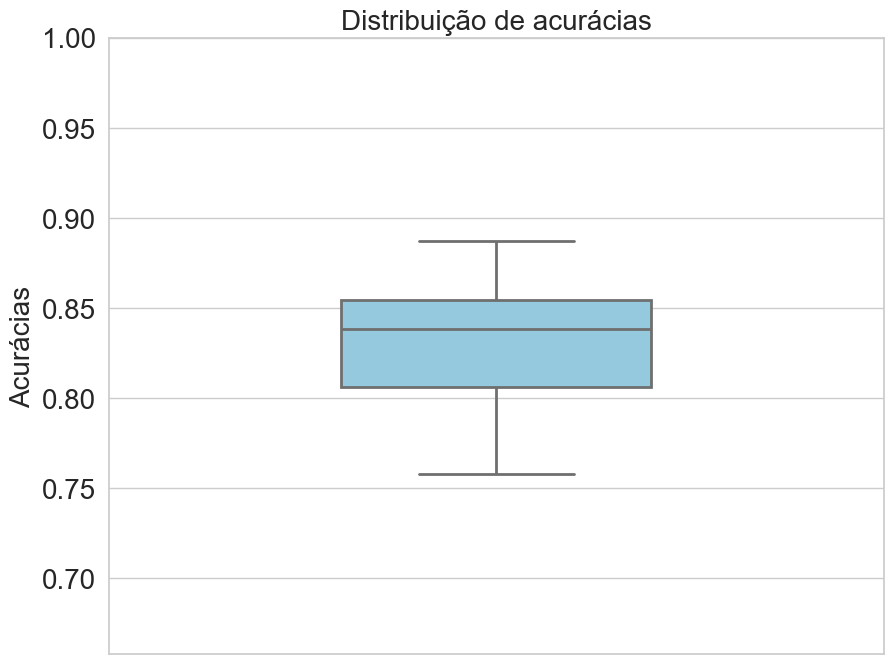

<module 'matplotlib.pyplot' from 'C:\\Users\\paulo\\AppData\\Local\\pypoetry\\Cache\\virtualenvs\\machine-learning-activities-xILO35vY-py3.11\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [10]:
image_generator.plot_boxplot(vector_distribution=knn_accuracy_vector, y_label='Acurácias',
                             image_title='Distribuição de acurácias')

# Baseado na melhor acurácia, pego os indices de treino e teste que geraram ela e calculo a superfície de decisão e também resgato a sua respectiva matriz de confusão

In [11]:
max_accuracy = df_results_knn['accuracy'].max()
indexes_of_max_accuracy = df_results_knn[df_results_knn['accuracy'] == max_accuracy].index.tolist()

index_selected = np.random.choice(indexes_of_max_accuracy)

print('Índices da melhor acurácia:', indexes_of_max_accuracy)
print('Índice selecionado:', index_selected)
print('Acurácia:', max_accuracy)

best_accuracy_train_indexes = df_results_knn.loc[index_selected, 'train_indexes']
best_accuracy_test_indexes = df_results_knn.loc[index_selected, 'test_indexes']

X_train, y_train, X_test, y_test = ClassifierUtils.separate_train_test(df=coluna_df,
                                                                       train_indexes=best_accuracy_train_indexes,
                                                                       test_indexes=best_accuracy_test_indexes,
                                                                       target_column_name=TARGET_COLUMN_NAME)


Índices da melhor acurácia: [15, 19]
Índice selecionado: 15
Acurácia: 0.8870967741935484


# Resgatando a matriz de confusão e plotando ela

In [12]:
confusion_matrix_result = df_results_knn.loc[index_selected, 'confusion_matrix']

<module 'matplotlib.pyplot' from 'C:\\Users\\paulo\\AppData\\Local\\pypoetry\\Cache\\virtualenvs\\machine-learning-activities-xILO35vY-py3.11\\Lib\\site-packages\\matplotlib\\pyplot.py'>

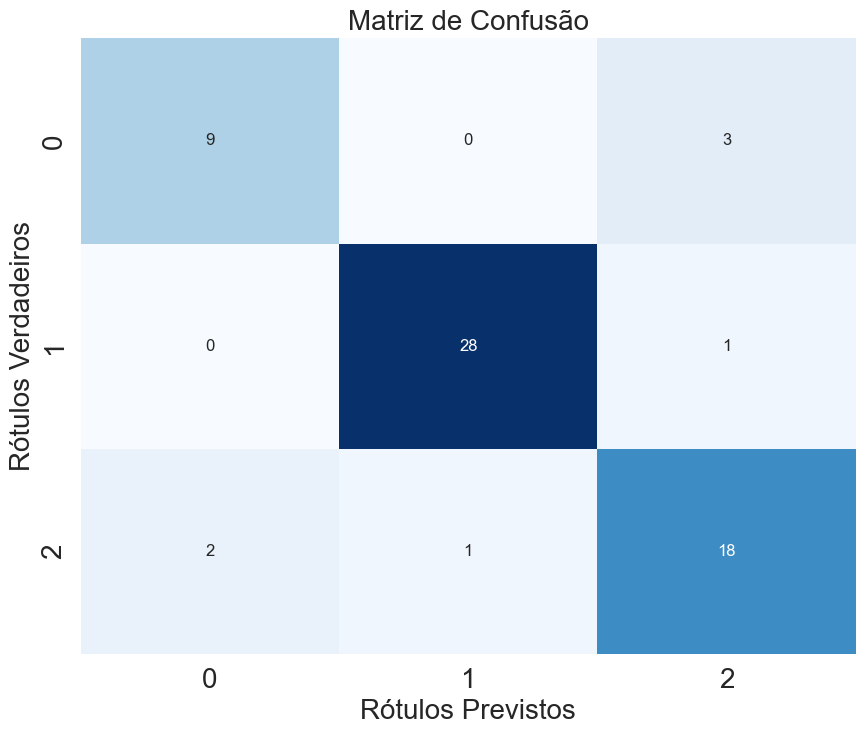

In [13]:
image_generator.plot_confusion_matrix_heatmap(confusion_matrix=confusion_matrix_result, x_label='Rótulos Previstos',
                                              y_label='Rótulos Verdadeiros', image_title='Matriz de Confusão')

# Calculo de superfície de decisão para o KNN

In [14]:
feature_x = X_train.columns[0]
feature_y = X_train.columns[1]

test_grid, x_shape, y_shape = DatasetUtils.create_test_grid(X_train=X_train, feature_x=feature_x, feature_y=feature_y,
                                                            resolution_points=RESOLUTION_POINTS, return_shapes=True)

y_pred_test_grid = KNNClassifier.predict(X_train=X_train[[feature_x, feature_y]], y_train=y_train, X_test=test_grid,
                                         k=K_NUMBER,
                                         distance_calculator_function=DistanceCalculator.calculate_euclidean_distance)

y_pred_test_grid = y_pred_test_grid.reshape(x_shape)

# Plot da superfície de decisão para o KNN

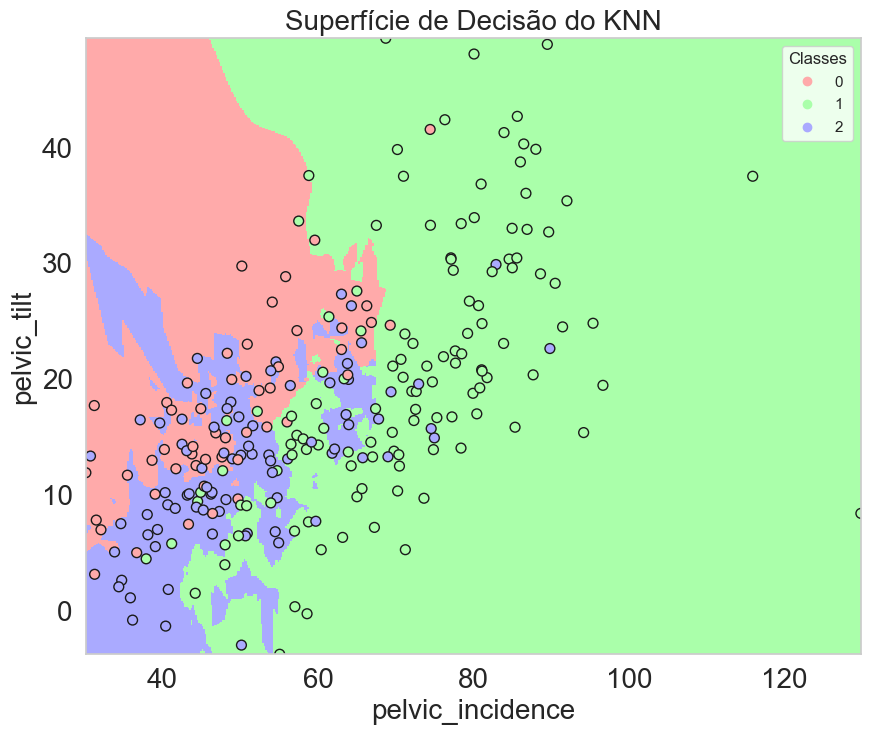

In [15]:
knn_surface_decision_image = image_generator.plot_decision_surface(X_train=X_train, y_train=y_train,
                                                                   y_pred=y_pred_test_grid,
                                                                   image_title='Superfície de Decisão do KNN',
                                                                   feature_x=feature_x, feature_y=feature_y,
                                                                   resolution_points=RESOLUTION_POINTS)


# Treinamento e avaliação dos modelos, juntamente com a criação de tabela de métricas para o NC(centróide mais próximo)

In [ ]:
ncp_holdout_indexes = create_multiple_holdout_indexes(df=coluna_df, n_indexes=HOLDOUT_INDEXES_NUMBER,
                                                      test_size=TEST_SIZE)

ncp_accuracy_list = []

for train_indexes, test_indexes in ncp_holdout_indexes:
    X_train, y_train, X_test, y_test = separate_train_test(df=coluna_df, train_indexes=train_indexes,
                                                           test_indexes=test_indexes,
                                                           target_column_name=TARGET_COLUMN_NAME)
    y_pred = nearest_centroid_predict(X_train=X_train, y_train=y_train, X_test=X_test)

    accuracy = calculate_accuracy(y_true=y_test, y_pred=y_pred)
    error_rate = calculate_error_rate(y_true=y_test, y_pred=y_pred)

    confusion_matrix_result = confusion_matrix(y_true=y_test, y_pred=y_pred)

    ncp_accuracy_list.append((accuracy, error_rate, train_indexes, test_indexes, y_pred, confusion_matrix_result))

df_results_nc = pd.DataFrame(ncp_accuracy_list,
                             columns=['accuracy', 'error_rate', 'train_indexes', 'test_indexes', 'y_pred',
                                      'confusion_matrix'])

df_results_nc

# Vetor de acurácias

In [ ]:
nc_accuracy_vector = pd.Series(df_results_nc['accuracy'])
nc_accuracy_vector

# Boxplot das acurácias para o NC

In [ ]:
sns.set_theme(style='whitegrid')

plt.figure(figsize=FIG_SIZE)
sns.boxplot(y=nc_accuracy_vector, width=0.4, color='skyblue', linewidth=2, fliersize=5)
plt.title('Distribuição de acurácias', fontsize=20)
plt.ylabel('Acurácias', fontsize=20)
plt.ylim(min(nc_accuracy_vector) - 0.1, 1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

# Baseado na melhor acurácia, pego os indices de treino e teste que geraram ela e calculo a superfície de decisão e também resgato a sua respectiva matriz de confusão

In [ ]:
max_accuracy = df_results_nc['accuracy'].max()
indexes_of_max_accuracy = df_results_nc[df_results_nc['accuracy'] == max_accuracy].index.tolist()

index_selected = random.choice(indexes_of_max_accuracy)

print('Índices da melhor acurácia:', indexes_of_max_accuracy)
print('Índice selecionado:', index_selected)
print('Acurácia:', max_accuracy)

best_accuracy_train_indexes = df_results_nc.loc[index_selected, 'train_indexes']
best_accuracy_test_indexes = df_results_nc.loc[index_selected, 'test_indexes']

X_train, y_train, X_test, y_test = separate_train_test(df=coluna_df, train_indexes=best_accuracy_train_indexes,
                                                       test_indexes=best_accuracy_test_indexes,
                                                       target_column_name=TARGET_COLUMN_NAME)

# Resgatando a matriz de confusão e plotando ela

In [ ]:
confusion_matrix_result = df_results_nc.loc[index_selected, 'confusion_matrix']

plt.figure(figsize=FIG_SIZE)
sns.heatmap(confusion_matrix_result, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 20})
plt.xlabel("Rótulos Previstos", fontsize=20)
plt.ylabel("Rótulos Verdadeiros", fontsize=20)
plt.title("Matriz de Confusão", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

# Calculo de superfície de decisão para NR

In [ ]:
feature_x = X_train.columns[0]
feature_y = X_train.columns[1]

feature_x_max = X_train[feature_x].max()
feature_x_min = X_train[feature_x].min()

feature_y_max = X_train[feature_y].max()
feature_y_min = X_train[feature_y].min()

print(f"Feature {feature_x} - Máximo: {feature_x_max}, Mínimo: {feature_x_min}")

print(f"Feature {feature_y} - Máximo: {feature_y_max}, Mínimo: {feature_y_min}")

h = 0.5

xx, yy = np.meshgrid(np.arange(feature_x_min, feature_x_max + h, h),
                     np.arange(feature_y_min, feature_y_max + h, h))

test_grid = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=[feature_x, feature_y])

y_pred_test_grid = nearest_centroid_predict(X_train, y_train, test_grid)

y_pred_test_grid = y_pred_test_grid.reshape(xx.shape)

# Plot da superfície de decisão para o NC

In [ ]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

plt.figure(figsize=FIG_SIZE)
plt.pcolormesh(xx, yy, y_pred_test_grid, cmap=cmap_light)
sc = plt.scatter(X_train[feature_x], X_train[feature_y], c=y_train, edgecolor='k', s=50, cmap=cmap_light)
plt.legend(*sc.legend_elements(), title="Classes", loc="upper right")

plt.xlabel(feature_x, fontsize=20)
plt.ylabel(feature_y, fontsize=20)
plt.title('Superfície de Decisão do NC', fontsize=20)

plt.xlim(feature_x_min, feature_x_max)
plt.ylim(feature_y_min, feature_y_max)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()